In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
corpus_train = pd.read_excel('~/TFM_fake_news_detector/data/Corpus_spanish_train.xlsx', index_col = 0)
corpus_test = pd.read_excel('~/TFM_fake_news_detector/data/Corpus_spanish_test.xlsx', index_col = 0)

corpus = pd.concat([corpus_train, corpus_test])
corpus = corpus.sample(frac = 1)

corpus.to_csv('~/TFM_fake_news_detector/data_exploration/corpus_spanish.csv')

In [6]:
corpus = pd.read_csv('~/TFM_fake_news_detector/data_exploration/corpus_spanish.csv')

In [7]:
corpus.head()

,Id,Category,Topic,Source,Headline,Text,Link
0,641,True,Entertainment,Caras,Sofía Castro y Alejandro Peña Pretelini: una i...,Sofía Castro y Alejandro Peña Pretelini: una i...,https://www.caras.com.mx/sofia-castro-alejandr...
1,6,True,Education,Heraldo,Un paso más cerca de hacer los exámenes 'online',Un paso más cerca de hacer los exámenes 'onlin...,https://www.heraldo.es/noticias/suplementos/he...
2,141,True,Science,HUFFPOST,Esto es lo que los científicos realmente piens...,Esto es lo que los científicos realmente piens...,https://www.huffingtonpost.com/entry/scientist...
3,394,True,Politics,El financiero,Inicia impresión de boletas para elección pres...,Inicia impresión de boletas para elección pres...,http://www.elfinanciero.com.mx/elecciones-2018...
4,139,True,Sport,FIFA,A *NUMBER* día del Mundial,A *NUMBER* día del Mundial\nFIFA.com sigue la ...,https://es.fifa.com/worldcup/news/a-1-dia-del-...


Checking values types

In [8]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 7 columns):
Id          971 non-null int64
Category    971 non-null object
Topic       971 non-null object
Source      971 non-null object
Headline    971 non-null object
Text        971 non-null object
Link        971 non-null object
dtypes: int64(1), object(6)
memory usage: 53.2+ KB


Checking if there are NA Values

In [11]:
corpus.isnull().sum()

Category    0
Topic       0
Source      0
Headline    0
Text        0
Link        0
dtype: int64

Number of news per Category 'Fake' and 'True'

Category
Fake    480
True    491
dtype: int64


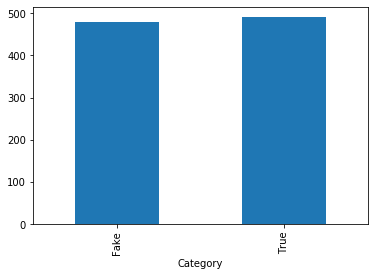

In [12]:
plot_cat = corpus.groupby('Category').size()
print(plot_cat)

plot_cat.plot.bar()

In [46]:
plot_topic

Topic
Politics         323
Entertainment    148
Society          134
Sport            124
Science           89
Health            46
Economy           43
Security          42
Education         22
dtype: int64

Total news in the corpus per Topic

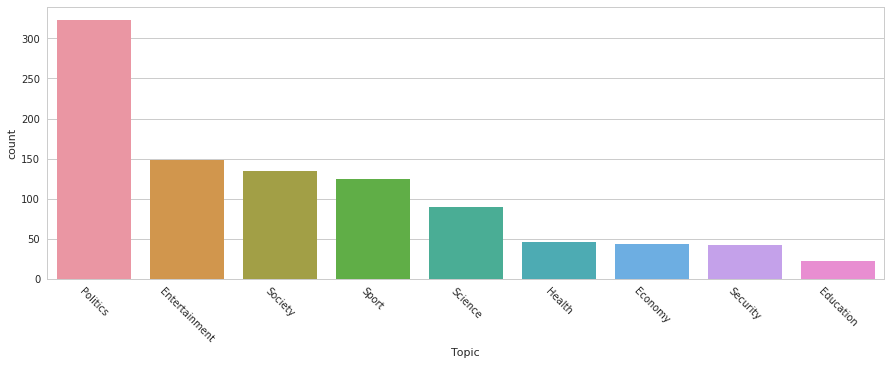

In [50]:
plot_topic = corpus.groupby('Topic').size().sort_values(ascending = False)

plt.figure(figsize=(15,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Topic' , order = corpus['Topic'].value_counts().index, data = corpus)
sticks = plt.xticks(rotation = -45)

Fake news and True news per topic

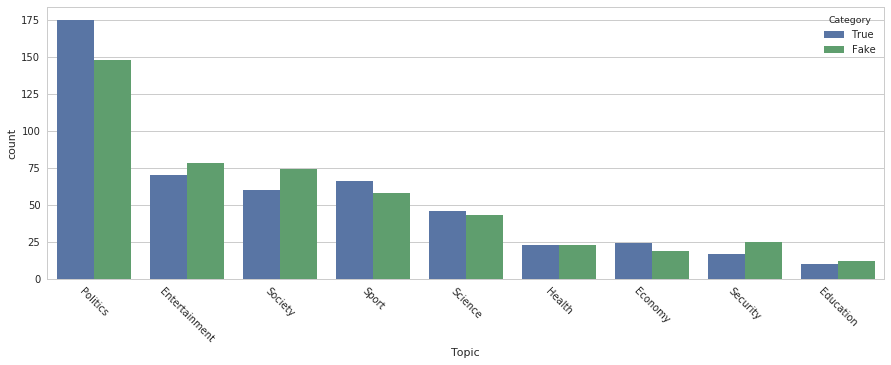

In [40]:
plt.figure(figsize=(15,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Topic' , order = corpus['Topic'].value_counts().index, hue = 'Category', data = corpus)
sticks = plt.xticks(rotation = -45)

In [57]:
plot_source = corpus.groupby('Source').size().sort_values(ascending = False)
plot_source

Source
El Dizque            135
El Ruinaversal        94
El país               67
Excelsior             45
El Universal          40
                    ... 
NEWSner                1
Nacion321              1
News Week español      1
Nippon                 1
20 Minutos             1
Length: 167, dtype: int64

In [63]:
grouped = corpus.groupby(['Source']).size().sort_values(ascending = False)
grouped

Source
El Dizque            135
El Ruinaversal        94
El país               67
Excelsior             45
El Universal          40
                    ... 
NEWSner                1
Nacion321              1
News Week español      1
Nippon                 1
20 Minutos             1
Length: 167, dtype: int64

In [64]:
grouped.filter(lambda x: len(x) > 10)

TypeError: 'function' object is not iterable

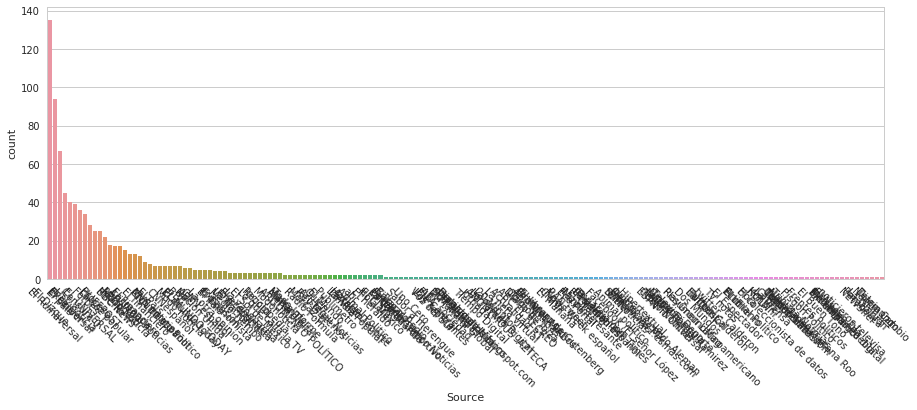

In [65]:
plot_source = corpus.groupby('Source').size().sort_values(ascending = False)

plt.figure(figsize=(15,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Source' , order = corpus['Source'].value_counts().index, data = corpus)
sticks = plt.xticks(rotation = -45)